ar = 0.0
br = 1.5

Final Answers:
mu = 25.809622897811263
lambda = 0.001460436525489001
c = 0.021560876239314915


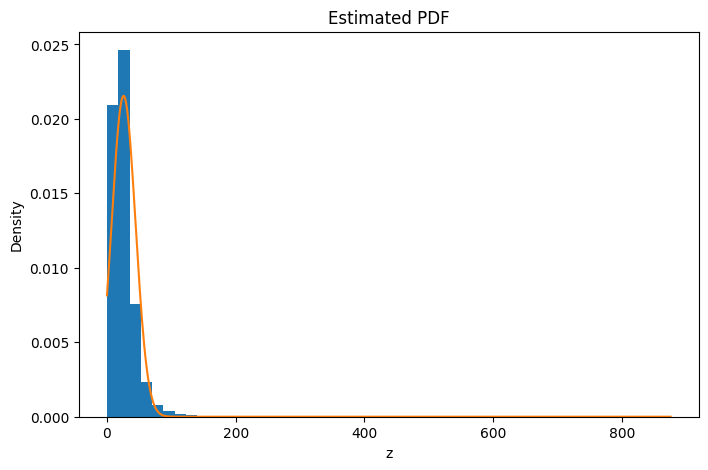

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", encoding="latin1", low_memory=False)

x = df["no2"].dropna()
x = x[x >= 0]

# Roll number
r = 102303544

ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)

z = x + ar * np.sin(br * x)

mu = z.mean()
sigma2 = ((z - mu)**2).mean()
lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print("\nFinal Answers:")
print("mu =", mu)
print("lambda =", lam)
print("c =", c)

z_range = np.linspace(z.min(), z.max(), 500)
pdf = c * np.exp(-lam * (z_range - mu)**2)

plt.figure(figsize=(8,5))
plt.hist(z, bins=50, density=True)
plt.plot(z_range, pdf)
plt.title("Estimated PDF")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()
